# Salary Analysis - How well do jobs and skills pay for Data Analysts ?

### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analyst
3. Visualize for highest paying skills and most demanded skills

### Import libraries and data

In [55]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

### Top paid skills vs Most in-demand skills in Salary

In [56]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [57]:
df__skills_count_median = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_demand_skills = df__skills_count_median.sort_values(by='count', ascending=False).head(10).sort_values(by='median',ascending=False)
df_top_paid = df__skills_count_median.sort_values(by='median', ascending=False).head(10)

In [58]:
df_demand_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


In [59]:
df_top_paid

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


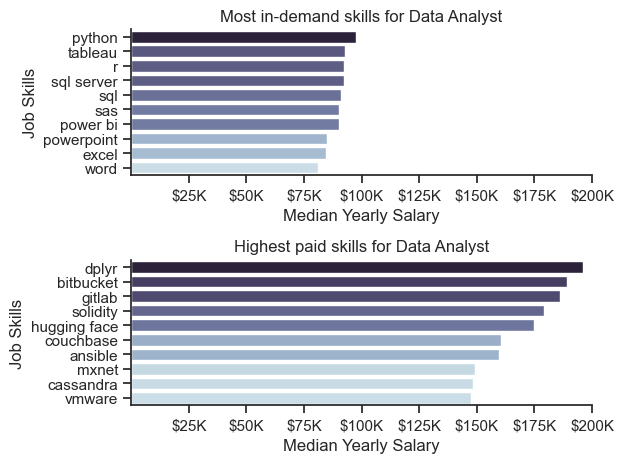

In [60]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

# Top in-demand skills
sns.barplot(
    data=df_demand_skills,
    x='median',
    y='job_skills',
    hue='median',
    palette='ch:s=.25,rot=-.25',
    legend=False,
    ax=ax[0]
)
ax[0].set_xlabel('Median Yearly Salary')
ax[0].set_ylabel('Job Skills')
ax[0].set_xlim(10,200000)
ax[0].set_title('Most in-demand skills for Data Analyst')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))

# Top paid skills
sns.barplot(
    data=df_top_paid,
    x='median',
    y='job_skills',
    hue='median',
    palette='ch:s=.25,rot=-.25',
    legend=False,
    ax=ax[1]
)
ax[1].set_xlabel('Median Yearly Salary')
ax[1].set_ylabel('Job Skills')
ax[1].set_xlim(10,200000)
ax[1].set_title('Highest paid skills for Data Analyst')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))

sns.despine()

fig.tight_layout(h_pad=1)

### Salary distributions of data jobs in the US (BOXPLOT)

In [61]:
df_US = df[df['job_country'] == 'United States']
top_roles = df_US['job_title_short'].value_counts().head(6).index.tolist()
top_roles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer']

In [62]:
df_US_top_roles = df_US[df['job_title_short'].isin(top_roles)]
df_US_top_roles

C:\Users\duyvn\AppData\Local\Temp\ipykernel_17336\2408556350.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_US_top_roles = df_US[df['job_title_short'].isin(top_roles)]


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [63]:
df_salary_top_roles = df_US_top_roles[['job_title_short','salary_year_avg']]
df_salary_top_roles = df_salary_top_roles.dropna(subset='salary_year_avg').sort_values(by='salary_year_avg', ascending=False)
df_salary_top_roles

,job_title_short,salary_year_avg
554784,Data Scientist,960000.0
387378,Data Scientist,585000.0
404932,Data Engineer,525000.0
554140,Data Scientist,525000.0
417241,Senior Data Scientist,475000.0
...,...,...
214570,Data Analyst,30000.0
365886,Data Analyst,26444.0
252564,Data Analyst,25000.0
260702,Data Engineer,25000.0


In [145]:
job_order = df_salary_top_roles.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

Text(0, 0.5, '')

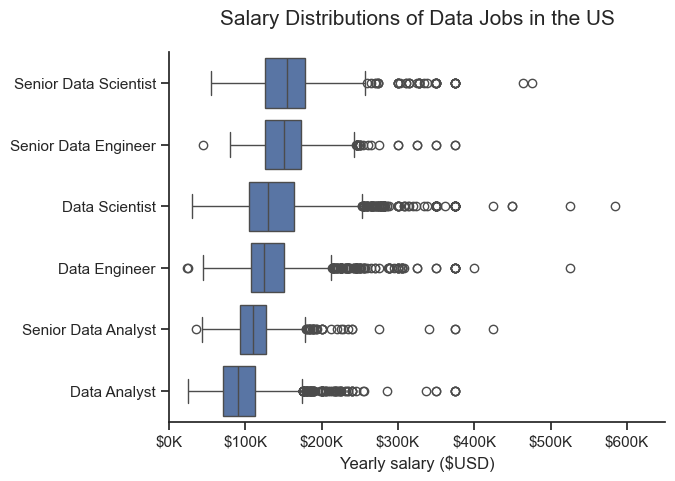

In [146]:
# Plotting
sns.boxplot(
    data=df_salary_top_roles,
    x='salary_year_avg',
    y='job_title_short',
    order=job_order
)

# Formatting the plot
sns.despine()
sns.set_theme(style='ticks')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))
plt.xlim(0,650000)
plt.title('Salary Distributions of Data Jobs in the US', fontsize=15, pad=20)
plt.xlabel('Yearly salary ($USD)')
plt.ylabel('')

### Historgram

In [77]:
job_titles = df_salary_top_roles['job_title_short'].unique().tolist()
job_titles

['Data Scientist',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Data Analyst',
 'Senior Data Engineer']

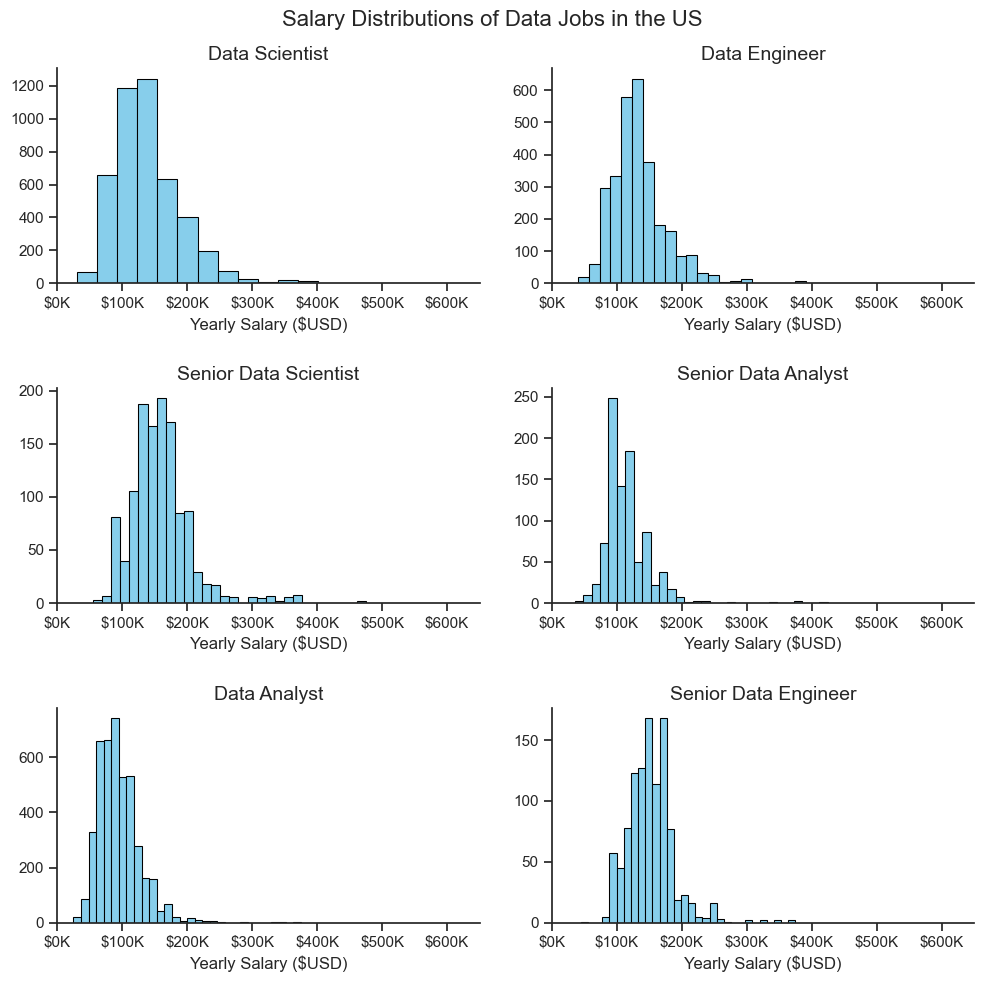

In [148]:
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax = ax.flatten()

for x, job_title in enumerate(job_titles):
    df_plot = df_salary_top_roles[df_salary_top_roles['job_title_short'] == job_title]
    sns.histplot(
        data=df_plot,
        ax=ax[x],
        legend=False,
        bins=30,
        edgecolor='black'
    )

    # Change the color of each bar
    for patch in ax[x].patches:
        patch.set_facecolor(color='skyblue')  # Cycle through colors list

    sns.despine()
    sns.set_theme(style='ticks')

    ax[x].set_xlim(0,650000)
    ax[x].set_title(job_title, fontsize=14)
    ax[x].set_xlabel('Yearly Salary ($USD)',fontsize=12)
    ax[x].set_ylabel('')
    ax[x].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

fig.suptitle('Salary Distributions of Data Jobs in the US', fontsize=16)
fig.tight_layout(h_pad=2, w_pad=2)